In [1]:
import gymnasium as gym


#定义环境
class MyWrapper(gym.Wrapper):

    def __init__(self):
        env = gym.make('Acrobot-v1', render_mode='rgb_array')
        super().__init__(env)
        self.env = env
        self.step_n = 0

    def reset(self,**kwargs):
        self.step_n = 0
        return self.env.reset(**kwargs)

    def step(self, action):
        state, reward, terminated, truncated, info = self.env.step(action)
        self.step_n += 1
        if self.step_n >= 1000:
            terminated = True
        return state, reward, terminated, truncated, info


env = MyWrapper()

env.reset()

(array([ 0.99976057, -0.02188142,  0.9999149 ,  0.01304596, -0.08463147,
        -0.01269919], dtype=float32),
 {})

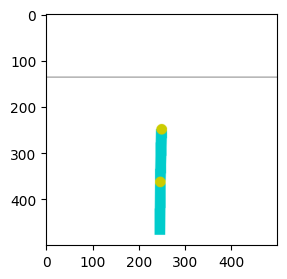

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline


#打印游戏
def show():
    plt.figure(figsize=(3, 3))
    plt.imshow(env.render())
    plt.show()


show()

## 使用 CUDA buffer

In [4]:
#认识游戏环境
def test_env():
    print('env.observation_space=', env.observation_space)
    print('env.action_space=', env.action_space)

    state, probs = env.reset()
    action = env.action_space.sample()
    next_state, reward, terminated, truncated, info  = env.step(action)

    print('state=', state)
    print('action=', action)
    print('next_state=', next_state)
    print('reward=', reward)
    print('done=', terminated)
    print('probs=',probs)


test_env()

env.observation_space= Box([ -1.        -1.        -1.        -1.       -12.566371 -28.274334], [ 1.        1.        1.        1.       12.566371 28.274334], (6,), float32)
env.action_space= Discrete(3)
state= [ 0.9994413   0.03342152  0.99596673 -0.08972333 -0.0358575   0.00137067]
action= 2
next_state= [ 0.9999711   0.00760515  0.9990651  -0.04323043 -0.21549018  0.45227683]
reward= -1.0
done= False
probs= {}


In [23]:
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env

#初始化模型
model = A2C(
    policy='MlpPolicy',
    env=make_vec_env(MyWrapper, n_envs=8),  #使用N个环境同时训练
    learning_rate=1e-3,
    n_steps=5,  #运行N步后执行更新,batch_size=n_steps*n_envs
    gamma=0.9,
    gae_lambda=1.0,
    ent_coef=0.0,
    vf_coef=0.5,
    max_grad_norm=0.5, 
    rms_prop_eps=1e-05, 
    use_rms_prop=True,
    use_sde=False,
    sde_sample_freq=-1,
    rollout_buffer_class=None,
    rollout_buffer_kwargs=None,
    normalize_advantage=False,
    stats_window_size=100,
    tensorboard_log=None,
    policy_kwargs=None,
    verbose=1, 
    seed=None, 
    device='cuda', 
    _init_setup_model=True)

model

Using cuda device


In [24]:
from stable_baselines3.common.evaluation import evaluate_policy

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

c:\Users\13306\anaconda3\envs\SB3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(-499.05, 4.140953996363639)

In [25]:
# #训练
model.learn(30_0000, progress_bar=True)

# #保存模型
model.save('save/1.A2C.Acrobot')

c:\Users\13306\anaconda3\envs\SB3\lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter
support
  warnings.warn('install "ipywidgets" for Jupyter support')

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 153      |
|    ep_rew_mean        | -152     |
| time/                 |          |
|    fps                | 2955     |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 4000     |
| train/                |          |
|    entropy_loss       | -0.688   |
|    explained_variance | 0.615    |
|    learning_rate      | 0.001    |
|    n_updates          | 99       |
|    policy_loss        | -0.191   |
|    value_loss         | 0.694    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 121      |
|    ep_rew_mean        | -120     |
| time/                 |          |
|    fps                | 2978     |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 8000     |
| train/                |          |
|

In [26]:
#加载模型
model = A2C.load('save/1.A2C.Acrobot')

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

c:\Users\13306\anaconda3\envs\SB3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(-93.25, 29.130525226984837)

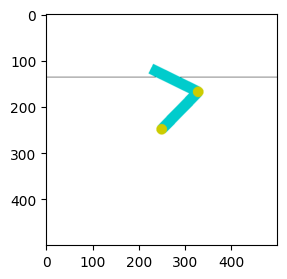

-93.0 94 [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0]


In [29]:
from IPython import display
import random


def test():
    state,_ = env.reset()
    reward_sum = []
    terminated = False
    while not terminated:
        action, _ = model.predict(state,deterministic=True)
        action = action.item()
        state, reward, terminated, truncated, info = env.step(action)
        reward_sum.append(reward)

        if len(reward_sum) % 1 == 0:
            display.clear_output(wait=True)
            show()

    print(sum(reward_sum), len(reward_sum), reward_sum)


test()